In [ ]:
import os
import numpy as np
from numpy import save
from keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout, LeakyReLU
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#load folder datasets
folder = "/content/drive/MyDrive/Renewable energy/RE_CNN_Image"
#tiền xử lý dữ liệu
photos,labels = list(), list()
for file in os.listdir(folder):
  output = 0
  if file.startswith('good'):
    output = 0
  elif file.startswith('defect'):
    output = 1
  if output is not None:
    img = load_img(os.path.join(folder,file), target_size=(200,200,3))
    img = img_to_array(img)
    photos.append(img)
    labels.append(output)
#Xác định kiểu cho mảng
photos = np.array(photos)
labels = np.array(labels)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(photos,labels,test_size=0.3, random_state=42)
x1=x_train
x2=x_test
y1=y_train
y2=y_test

In [ ]:
x_train=x_train.reshape(77,200,200,3)
x_train = x_train.astype('float32') / 255

x_test=x_test.reshape(33,200,200,3)
x_test = x_test.astype('float32') / 255

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train,2) 
y_test = to_categorical(y_test,2) 

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=(200,200,3), padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), activation='linear', padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128, kernel_size=(3,3), activation='linear', padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))


model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 128)      0

In [ ]:
from keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

system = model.fit(x_train , y_train,validation_split=0.2, epochs=50, batch_size=128, verbose=1)

Epoch 1/50
1/1 [==============================] - 14s 14s/step - loss: 0.6836 - accuracy: 0.5574 - val_loss: 8.2186 - val_accuracy: 0.3750
Epoch 2/50
1/1 [==============================] - 0s 114ms/step - loss: 5.2388 - accuracy: 0.5902 - val_loss: 10.9237 - val_accuracy: 0.6250
Epoch 3/50
1/1 [==============================] - 0s 106ms/step - loss: 16.9169 - accuracy: 0.4098 - val_loss: 3.7706 - val_accuracy: 0.6250
Epoch 4/50
1/1 [==============================] - 0s 104ms/step - loss: 5.3361 - accuracy: 0.4098 - val_loss: 0.1470 - val_accuracy: 0.9375
Epoch 5/50
1/1 [==============================] - 0s 109ms/step - loss: 0.0599 - accuracy: 0.9672 - val_loss: 0.0629 - val_accuracy: 1.0000
Epoch 6/50
1/1 [==============================] - 0s 118ms/step - loss: 0.0295 - accuracy: 0.9836 - val_loss: 2.9225 - val_accuracy: 0.3750
Epoch 7/50
1/1 [==============================] - 0s 108ms/step - loss: 1.5413 - accuracy: 0.6557 - val_loss: 7.9967 - val_accuracy: 0.6250
Epoch 8/50
1/1 [===

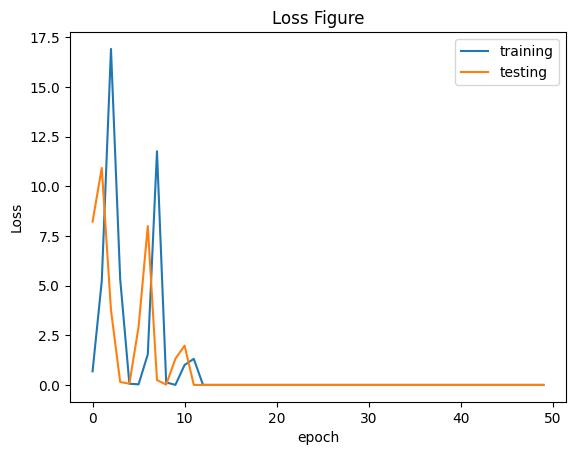

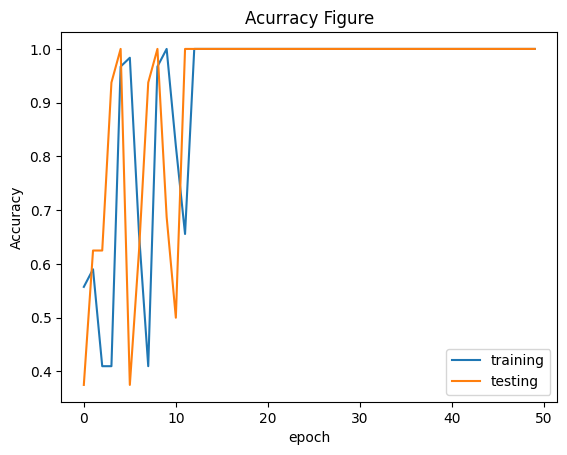

Test Score: 0.0
Test Accuracy: 1.0


In [ ]:
plt.figure(1)
plt.plot(system.history['loss'])
plt.plot(system.history['val_loss'])
plt.legend(['training','testing'])
plt.title('Loss Figure')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.figure(2)
plt.plot(system.history['accuracy'])
plt.plot(system.history['val_accuracy'])
plt.legend(['training','testing'])
plt.title('Acurracy Figure')
plt.xlabel('epoch')
plt.ylabel('Accuracy')

plt.show()
score =model.evaluate(x_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

TEST WITH TESTING DATA

2/2 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Loss rate:  0.0
Testing accuracy rate:  1.0
1/1 [==============================] - 0s 97ms/step
Expectation [1]
Answer 1
1/1 [==============================] - 0s 19ms/step
Expectation [0]
Answer 0
1/1 [==============================] - 0s 20ms/step
Expectation [0]
Answer 0
1/1 [==============================] - 0s 19ms/step
Expectation [1]
Answer 1
1/1 [==============================] - 0s 20ms/step
Expectation [1]
Answer 1
1/1 [==============================] - 0s 18ms/step
Expectation [1]
Answer 1
1/1 [==============================] - 0s 21ms/step
Expectation [0]
Answer 0
1/1 [==============================] - 0s 20ms/step
Expectation [0]
Answer 0
1/1 [==============================] - 0s 19ms/step
Expectation [1]
Answer 1
1/1 [==============================] - 0s 25ms/step
Expectation [0]
Answer 0


<function matplotlib.pyplot.show(close=None, block=None)>

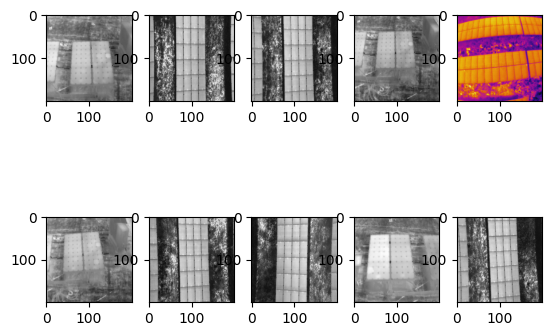

In [ ]:
model_loss, model_acc = model.evaluate(x_test, y_test)
print('Loss rate: ', model_loss)
print('Testing accuracy rate: ', model_acc)

for i in range(0,10):
  img1=x2[i]
  plt.subplot(2,5,i+1) 
  plt.imshow(x_test[i])
  img1=np.array(img1)
  img1 = img1.reshape(1, 200, 200, 3)
  img1=img1/255
  print('Expectation', np.argmax(model.predict(img1),axis=-1))
  print('Answer', y2[i])
plt.show

PREDICT

1/1 [==============================] - 0s 18ms/step


array([1])

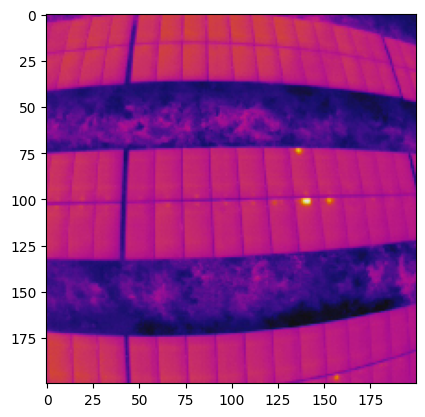

In [ ]:
import numpy as np
from keras.utils import load_img, img_to_array
#Tải ảnh
filename = "/content/drive/MyDrive/Renewable energy/test 2.jpg"
img = load_img(filename,target_size=(200,200))
plt.imshow(img)
#chuyển ảnh thành mảng
img = img_to_array(img)
#Định dạng thành mẫu dữ liệu với 3 kênh
img = img.reshape(1,200,200,3)
# Chuẩn bị dữ liệu dạng pixel
img = img.astype('float32')
img = img/255.0
np.argmax(model.predict(img),axis=1)